# CmpE 561 Natural Language Processing - Application Project 1 (Fall 17)
### Arda Akdemir & Burak Suyunu
### Instructor: Tunga Güngör

## Introduction

In this project, we implemented a morphological analyzer for English using the two-level morphology paradigm. The components of the analyzer will have the following properties:

* **Lexicon**: The lexicon includes 100 stems. There are stems with varying lengths; there are several stems of different POSs (nouns, verbs, adjectives, prepositions, etc.); there are also ambiguous stems (e.g. a stem which can be both noun and verb)

* **Morphotactics**: The morphotactics includes all the suffixes used for nouns, verbs, adjectives, and adverbs. Prefixes are out of the scope of the project; only suffixes are considered. It is clear that more than one suffix may be attached to a stem (e.g. compute + - er + -ize + -ation → computerization), and the order of the suffixes are important (e.g. *compute + -ize + -ation + -er). The lexicon includes entries to which these suffixes can be applied..

* **Morphophonemics**: We used e-insertion, e-deletion, y-replacement rules in this project.

## Lexicon

We have 2 different documents as our dataset.

* **Words.txt**: This document includes stems, POS tag of the stems, and possible initial suffixes that these stems can get. We also included the new form of the stems after getting the suffixes. The format of the document is as follows:    
"stem1" "POS tag of the stem2"   
"stem1+suffix11" "suffix11" "POS tag of the stem1+suffix11"    
...    
"stem1+suffix1N" "suffix1N" "POS tag of the stem1+suffix1N"    
.   
"stem2" "POS tag of the stem2"   
"stem2+suffix21" "suffix21" "POS tag of the stem2+suffix21"    
...    
"stem2+suffix2M" "suffix2M" "POS tag of the stem2+suffix2M"    
.   
**Example Input:**   
compute v   
compute er n   
computation ation n   
computize ize v  
computable able adj   
.   
invest v   
investor or n   
investment ment n   
investing ing n
     
     
* **Suffixes.txt**: This document includes suffix interactions which means that which suffixes can a word take that ends with a specific suffix. In each line there are 4 strings:   
"suffix1" "suffix2" "POS tag before suffix2 added" "POS tag after suffix2 added"    
For example; "_al ist n n_" means that a noun word ending with _al_ suffix can take _ist_ suffix and POS tag of the word changes to noun. Nation_al_ + _ist_ => Nation_alist_    
.     
**Example Input:**      
ful ness adj n    
less ness adj n    
less ly adj adv    
al ist n n    
al ize n v    

## Data Structures

We used dictionaries to store our data. We have 7 main variables (dictionaries). (Derived word means stem+affixes)

* **stems**: key: stem word => value: POS tag and list of possible initial suffixes with POS tag of words after adding this suffixes.     
_'build': ['v', [['ing', 'n'], ['er', 'n'], ['s', 'v']]]_ : build is the stem. build is a verb. build can take ing, er, s suffixes and these suffixes convert POS tag of the word build from verb to noun, noun and verb respectively.


* **stems2**: key: derived word => value: [[stem, POS tag]]      
_'music': [['music', 'n']]_ : This is just a compact represantation of the stems to speed up the searches.


* **firstDerivedWords**: key: derived word => value: [[stem, POS tag], [suffix, POS tag before suffix is added, POS tag after suffix is added]]      
_'musical': [['music', 'n'], ['al', 'n', 'adj']]_ : musical is the derived word. music is the stem of the word and it is a noun. al is the suffix music got, and al suffix turns the POS tag of music from noun to adjective.


* **suffixes**: key: suffix => value: [K*[newSuffix, POS tag before newSuffix added, POS tag after newSuffix added]] (K is the number of new suffixes that can be added after the key suffix)     
_'ive': [['ity', 'adj', 'n'], ['ness', 'adj', 'n'], ['ly', 'adj', 'adv']]_ : ive is the suffix. When a word ends with suffix ive which makes the word adjective, can also take ity, ness and ly suffixes and this suffixses change the POS tag of the word from adjective to noun, noun and adverb respectively.   
_create + ive + ity = creativity_   


* **secondDerivedWords**: key: derived word => value: [[stem, POS tag], K*[suffix, POS tag before suffix is added, POS tag after suffix is added]] (K is the number of suffixes that derived word has)
_'receivers': [['receive', 'v'], ['er', 'v', 'n'], ['s', 'n', 'n']]_ : receivers is the derived word. receive is the stem of the word and it is a verb. er is the first suffix receive got, and er suffix turns the POS tag of receive from verb to noun (receiver). s is the second suffix receive got (or the suffix that reciever got), and s suffix turns the POS tag of receiver from noun to noun (receivers). 


* **derivedWords**: This is the union of _firstDerivedWords_ and _secondDerivedWords_ dictionaries. We use _derivedWords_ dictionary and _stems_ dictionary to convert words from surface form to lexical form and vice versa.


* **stemsAndDerivedWords**: This is the union of _stems2_ and _derivedWords_ dictionaries. We use _stemsAndDerivedWords_ dictionary for the drawing of FSTs and to speed up surface-lexical form transformation processes. **So with derivedWords, stemsAndDerivedWords dictionaries represent our finite state transducers.** 



## Methodology

We create our FSTs in two steps:

1. First, we made a list of stems with their initial suffixes. The word **initial** is important, because we are not intrested in stems' second or third consecutive suffixes. Only the first suffix.
2. Second, we made the Suffixes list which includes the order of suffixes. So, this list actually represents morphotactics. We used this list to generate new derived words by adding appropriate suffixes to the old derived words according to morphotactics.


* In the first part, we directly created words with one suffixes from stems by hand (firstDerivedWords). Because it is nearly impossible to make an automatical system for 100 words that knows which stem can take which suffix.
* In the second step, we used morphotactics to generate new words on top of the firstDerivedWords, because here we only used suffix-suffix interactions. This word generation process might generate words that are gramatically correct but not commonly used in English.
* While creating new words with morphotactics, we first set a limitation (3) to the number suffix a stem can take. However when we removed the limitation we realized that the number of suffixes a stem takes capped at 5. So, thanks ti our well-designed suffix relations it inherently preserved the natural limitation of suffix numbers.
* We used our ortographic rules while combining suffixes, as mentioned in 2. But, in the first part we didn't use ortograpchic rules. We directly pulled the derived words from the stems lexicon because we wanted the root of the word to be in the correct form. (We could also do it with ortographic rules but because we didn't cover all the rules there were be lots of misspelled words from root).
* As a last note, even if our FST doesn't a real FST, actually it is created in a very similar way. It starts from the stem of the given word and builds up to new forms of this word by using morphotactics and morphophonemics. It stores enough information to show the formation process and to convert structure into both directions (surface => lexicon, lexicon => surface). You can observe both the FST like transition diagram of the word with its stem family and the regular transition in written form.

## Algorithm

1. Read Stems.txt. Create stems and firstDerivedWords dictionaries. Creation of these two dictionaries are very straight forward, because Stems.txt has all the info that is needed. 
2. Read Suffixes.txt. Using morphotactics defined in Suffixes.txt create new words on top of firstDerivedWords and store in secondDerivedWords. Use Morphophonemics while combining suffixes.
3. Combine firstDerivedWords and secondDerivedWords dictionaries into derivedWords dictionaries then also combine derivedWords and stems2 dictionaries into stemsAndDerivedWords dictionaries.  Those two dictionaries function as our completed FSTs.
4. For a given surface form word, program can transform it into lexical form (and vice versa)
5. Also for a given surface form word, you can see the FST like transition diagram of the word with its stem family.

In [291]:
stems = dict()
stems2 = dict()
firstDerivedWords = dict()

file = open("words.txt", "r")
word = ''
for line in file.readlines():
    if len(line.split()) == 1:
        continue
    if len(line.split()) == 2:
        word = line.split()[0]
        pos = line.split()[1]
        stems[word] = [pos, []]
        stems2[word] = [[word, pos]]
    else:
        derWord = line.split()[0]
        suf = line.split()[1]
        derPos = line.split()[2]
        
        stems[word][1].append([suf, derPos])
        firstDerivedWords[derWord] = [[word, pos], [suf, pos, derPos, '']]

In [292]:
stems

{'across': ['prp', []],
 'after': ['prp', []],
 'appear': ['v', [['ance', 'n'], ['s', 'v'], ['ing', 'v']]],
 'area': ['n', [['s', 'n'], ['al', 'adj']]],
 'army': ['n', [['s', 'n']]],
 'art': ['n', [['ist', 'n'], ['s', 'n']]],
 'article': ['n', [['s', 'n'], ['ed', 'adj']]],
 'become': ['v', [['s', 'v']]],
 'begin': ['v', [['ing', 'n'], ['n', 'n'], ['s', 'v']]],
 'believe': ['v', [['s', 'v'], ['ed', 'v'], ['er', 'n']]],
 'big': ['adj', [['er', 'adj'], ['est', 'adj'], ['ness', 'n']]],
 'bird': ['n', [['s', 'n']]],
 'build': ['v', [['ing', 'n'], ['er', 'n'], ['s', 'v']]],
 'by': ['prp', []],
 'calculate': ['v',
  [['er', 'n'], ['ation', 'n'], ['able', 'adj'], ['ed', 'v']]],
 'camera': ['n', [['s', 'n']]],
 'clear': ['adj',
  [['ly', 'adv'], ['er', 'adj'], ['est', 'adj'], ['ness', 'n']]],
 'compute': ['v',
  [['er', 'n'], ['ation', 'n'], ['ize', 'v'], ['able', 'adj']]],
 'consider': ['v', [['ing', 'v'], ['ation', 'n'], ['ate', 'adj'], ['s', 'v']]],
 'consume': ['v', [['er', 'n'], ['ing', 'n

In [293]:
firstDerivedWords

{'appearance': [['appear', 'v'], ['ance', 'v', 'n', '']],
 'appearing': [['appear', 'v'], ['ing', 'v', 'v', '']],
 'appears': [['appear', 'v'], ['s', 'v', 'v', '']],
 'areal': [['area', 'n'], ['al', 'n', 'adj', '']],
 'areas': [['area', 'n'], ['s', 'n', 'n', '']],
 'armies': [['army', 'n'], ['s', 'n', 'n', '']],
 'articled': [['article', 'n'], ['ed', 'n', 'adj', '']],
 'articles': [['article', 'n'], ['s', 'n', 'n', '']],
 'artist': [['art', 'n'], ['ist', 'n', 'n', '']],
 'arts': [['art', 'n'], ['s', 'n', 'n', '']],
 'becomes': [['become', 'v'], ['s', 'v', 'v', '']],
 'beginner': [['begin', 'v'], ['n', 'v', 'n', '']],
 'beginning': [['begin', 'v'], ['ing', 'v', 'n', '']],
 'begins': [['begin', 'v'], ['s', 'v', 'v', '']],
 'believed': [['believe', 'v'], ['ed', 'v', 'v', '']],
 'believer': [['believe', 'v'], ['er', 'v', 'n', '']],
 'believes': [['believe', 'v'], ['s', 'v', 'v', '']],
 'bigger': [['big', 'adj'], ['er', 'adj', 'adj', '']],
 'biggest': [['big', 'adj'], ['est', 'adj', 'adj', 

In [294]:
suffixes = dict()

file = open("Suffixes.txt", "r")
for line in file.readlines():
    line = line.split()
    if line[0] not in suffixes:
        suffixes[line[0]] = [line[1:]]
    else:
        suffixes[line[0]].append(line[1:])

In [295]:
suffixes

{'age': [['s', 'n', 'n']],
 'al': [['ly', 'adj', 'adv'],
  ['ist', 'n', 'n'],
  ['ize', 'n', 'v'],
  ['izm', 'n', 'n'],
  ['logy', 'n', 'n'],
  ['istic', 'n', 'adj'],
  ['s', 'n', 'n']],
 'ance': [['s', 'n', 'n']],
 'ary': [['ly', 'adj', 'adv']],
 'ate': [['ly', 'adj', 'adv'], ['ness', 'adj', 'n']],
 'atic': [['al', 'n', 'adj']],
 'ation': [['al', 'n', 'adj']],
 'en': [['s', 'v', 'v'], ['ing', 'v', 'v'], ['ed', 'v', 'v']],
 'er': [['s', 'n', 'n'], ['s', 'n', 'n']],
 'ful': [['ly', 'adj', 'adv'],
  ['ness', 'adj', 'n'],
  ['ly', 'adj', 'adv'],
  ['ness', 'adj', 'n']],
 'ian': [['s', 'n', 'n']],
 'ical': [['ly', 'adj', 'adv']],
 'ine': [['er', 'v', 'n'],
  ['s', 'v', 'v'],
  ['ation', 'v', 'n'],
  ['ed', 'v', 'v'],
  ['ing', 'v', 'v']],
 'ish': [['ly', 'adj', 'adv']],
 'ive': [['ity', 'adj', 'n'], ['ness', 'adj', 'n'], ['ly', 'adj', 'adv']],
 'ize': [['ation', 'v', 'n'],
  ['ing', 'v', 'n'],
  ['ed', 'v', 'n'],
  ['er', 'v', 'n'],
  ['ed', 'v', 'v'],
  ['ing', 'v', 'v'],
  ['able', 'v', 

In [296]:
secondDerivedWords = dict()

# makes orthographic checks
# for e-deletion, e-insertion, y-replacement
# returns the correctly spelled form
def orthochechker(word,suffix):
    finalword=""
    orthoType = ""
    suffixedellist=["ing","ed","ation","able","ive","ion","er","ist","t"]
    stemeinslist=["s","x","z"]
    yrepilist=["ly","er","est","ical","ed"]
    yrepielist=["s"]
    #e deletion
    if word[len(word)-1]=="e":
        if suffix in suffixedellist:
            for a in range(0,len(word)-1):
                finalword+= word[a] 
            finalword+=suffix
            orthoType = "e-del"
    #e insertion
    elif word[len(word)-1]in stemeinslist:
        if suffix=="s":
            finalword=word+"e"
            finalword+=suffix
            orthoType = "e-ins"
    #y replacement
    elif word[len(word)-1]=="y":
        if suffix in yrepilist:
            for a in range(0,len(word)-1):
                finalword+= word[a]
            if suffix != 'ical':
                finalword+="i"
            finalword+=suffix
            orthoType = "y-repl"
        elif suffix in yrepielist:
            for a in range(0,len(word)-1):
                finalword+= word[a] 
            finalword+="ie"
            finalword+=suffix
            orthoType = "y-repl"
            
    if finalword == "":
        return word+suffix, orthoType
    else:
        return finalword, orthoType
    
def addSuffix(word, wordSuffixes):
    lastSuffix = wordSuffixes[-1][0]
    lastSuffixPOS = wordSuffixes[-1][2]
    if lastSuffix in suffixes:
        for extraSuffixes in suffixes[lastSuffix]:
            if extraSuffixes[1] == lastSuffixPOS:
                newWord, orthoType = orthochechker(word, extraSuffixes[0])
                secondDerivedWords[newWord] = wordSuffixes + [extraSuffixes + [orthoType]]
                if len(secondDerivedWords[newWord]):
                    addSuffix(newWord, secondDerivedWords[newWord])

In [297]:
def merge_two_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

for word, wordSuffixes in firstDerivedWords.items():
    addSuffix(word, wordSuffixes)
    
derivedWords = merge_two_dicts(firstDerivedWords, secondDerivedWords)
stemsAndDerivedWords = merge_two_dicts(stems2, derivedWords)

In [298]:
stemsAndDerivedWords

{'across': [['across', 'prp']],
 'after': [['after', 'prp']],
 'appear': [['appear', 'v']],
 'appearance': [['appear', 'v'], ['ance', 'v', 'n', '']],
 'appearances': [['appear', 'v'], ['ance', 'v', 'n', ''], ['s', 'n', 'n', '']],
 'appearing': [['appear', 'v'], ['ing', 'v', 'v', '']],
 'appears': [['appear', 'v'], ['s', 'v', 'v', '']],
 'area': [['area', 'n']],
 'areal': [['area', 'n'], ['al', 'n', 'adj', '']],
 'areally': [['area', 'n'], ['al', 'n', 'adj', ''], ['ly', 'adj', 'adv', '']],
 'areas': [['area', 'n'], ['s', 'n', 'n', '']],
 'armies': [['army', 'n'], ['s', 'n', 'n', '']],
 'army': [['army', 'n']],
 'art': [['art', 'n']],
 'article': [['article', 'n']],
 'articled': [['article', 'n'], ['ed', 'n', 'adj', '']],
 'articles': [['article', 'n'], ['s', 'n', 'n', '']],
 'artist': [['art', 'n'], ['ist', 'n', 'n', '']],
 'arts': [['art', 'n'], ['s', 'n', 'n', '']],
 'become': [['become', 'v']],
 'becomes': [['become', 'v'], ['s', 'v', 'v', '']],
 'begin': [['begin', 'v']],
 'beginner

In [299]:
print("Number of Stems: %d" % (len(stems)))

print("Number of firstDerivedWords: %d" % (len(firstDerivedWords)))
print("Number of secondDerivedWords: %d" % (len(secondDerivedWords)))
print("Number of derivedWords: %d" % (len(derivedWords)))
print()
print("Total possible words: %d" % (len(stemsAndDerivedWords)))

Number of Stems: 99
Number of firstDerivedWords: 252
Number of secondDerivedWords: 176
Number of derivedWords: 428

Total possible words: 527


In [329]:
def toIntermediate(word):
    if word in stems:
        wordPOS = stems[word][0]
        print(word + '^')
    elif word in derivedWords:
        wordSuffixes = derivedWords[word]
        print(wordSuffixes[0][0], end='')
        for suffix in wordSuffixes[1:]:
            print('^' + suffix[0], end='')
            if suffix[-1] != '':
                print('(' + suffix[-1] + ')', end='')
    else:
        print("No such word in lexicon!")

def surfaceLex(word):
    word = word.lower()
    if word in stemsAndDerivedWords:
        print("Surface Form to Intermediate Form:")
        toIntermediate(word)
        print()
        print()
        print("Intermediate Form to Lexical Form:")
        
        wordSuffixes = derivedWords[word]
        print(wordSuffixes[0][0] + '+' + wordSuffixes[0][1].upper(), end='')
        for suffix in wordSuffixes[1:]:
            print('+' + suffix[0].upper() + '(' + suffix[1] + '->' + suffix[2] + ')', end='')
    else:
        print("No such word in lexicon!")
        
def lexSurface(lex):
    wordFound = True
    stem = lex.split('+')[0].lower()
    wordSuffixes = lex.split('+')[2:]
    wordSuffixes = [ws.lower() for ws in wordSuffixes]
    if len(wordSuffixes) == 0 and stem in stems:
        print(stem)
    else:
        for w, wsuffixes in derivedWords.items():
            wordFound = False
            if stem == wsuffixes[0][0] and len(wordSuffixes)+1 == len(wsuffixes):
                wordFound = True
                for i, ws in enumerate(wsuffixes[1:]):
                    if wordSuffixes[i] != ws[0]:
                        wordFound = False
                        break
                if wordFound:
                    print("Lexical Form to Intermediate Form:")
                    toIntermediate(w)
                    print()
                    print()
                    print("Intermediate Form to Surface Form:")
                    print(w)
                    break
    if not wordFound:
        print("No such word in lexicon!")

In [330]:
import os, sys, inspect

cmd_folder = os.path.realpath(
    os.path.dirname(
        os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0])))

if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
    
from transitions import *
from transitions.extensions import GraphMachine
from IPython.display import Image, display, display_png

class Matter(object):
    # graph object is created by the machine
    def show_graph(self, **kwargs):
        self.get_graph(**kwargs).draw('state.png', prog='dot')
        display(Image('state.png'))

In [331]:
def drawFSTs(word):
    states = []
    transitions = []
    
    stem = stemsAndDerivedWords[word][0][0]
    
    for w, ws in stemsAndDerivedWords.items():
        if ws[0][0] == stem:
            states.append(w)

    for w1 in states:
        ws1 = stemsAndDerivedWords[w1]
        for w2 in states:
            ws2 = stemsAndDerivedWords[w2]
            if len(ws1) == len(ws2)+1:
                if ws1[:-1] == ws2:
                    trigger = ws1[-1][0] + '(' + ws1[-1][1] + '->' + ws1[-1][2] + ')'
                    if ws1[-1][-1] != '':
                        trigger += ' (' + ws1[-1][-1] + ')'
                    transitions.append({'trigger': trigger, 'source': w2, 'dest': w1})

    model = Matter()
    machine = GraphMachine(model=model, 
                           states=states, 
                           transitions=transitions,
                           initial=stem,
                           auto_transitions=False, # default value is False
                           title="Morphological Analyze of " + word,
                           show_conditions=True)
    model.show_graph()
    
    
    transitionOrder = []
    for ws in stemsAndDerivedWords[word][1:]:
        transition = ws[0] + '(' + ws[1] + '->' + ws[2] + ')'
        if ws[-1] != '':
            transition += ' (' + ws[-1] + ')'
        print(model.state)
        print(transition)
        getattr(model, transition)()
        print(model.state)
        model.show_graph()

In [332]:
surfaceLex('methodological')

Surface Form to Intermediate Form:
method^logy^ical(y-repl)

Intermediate Form to Lexical Form:
method+N+LOGY(n->n)+ICAL(n->adj)

In [333]:
lexSurface('method+N+LOgY+ical')

Lexical Form to Intermediate Form:
method^logy^ical(y-repl)

Intermediate Form to Surface Form:
methodological


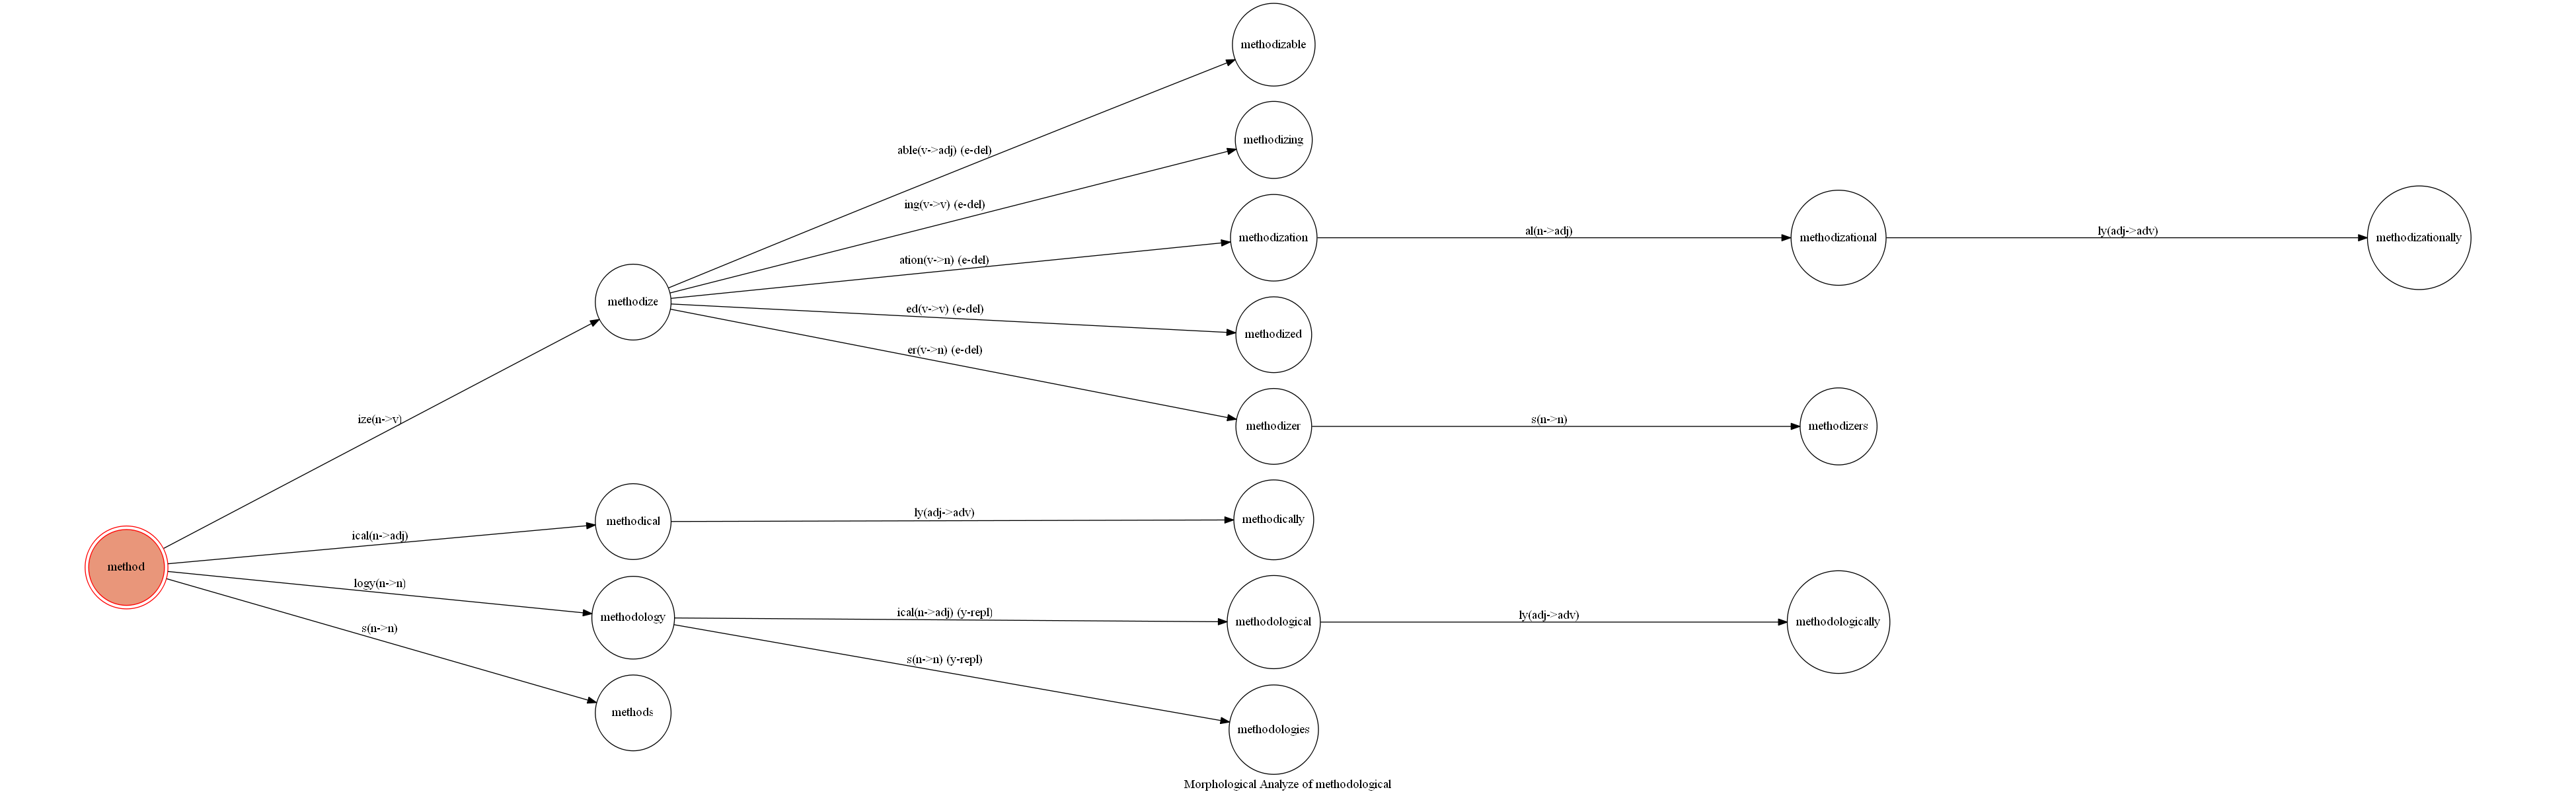

method
logy(n->n)
methodology


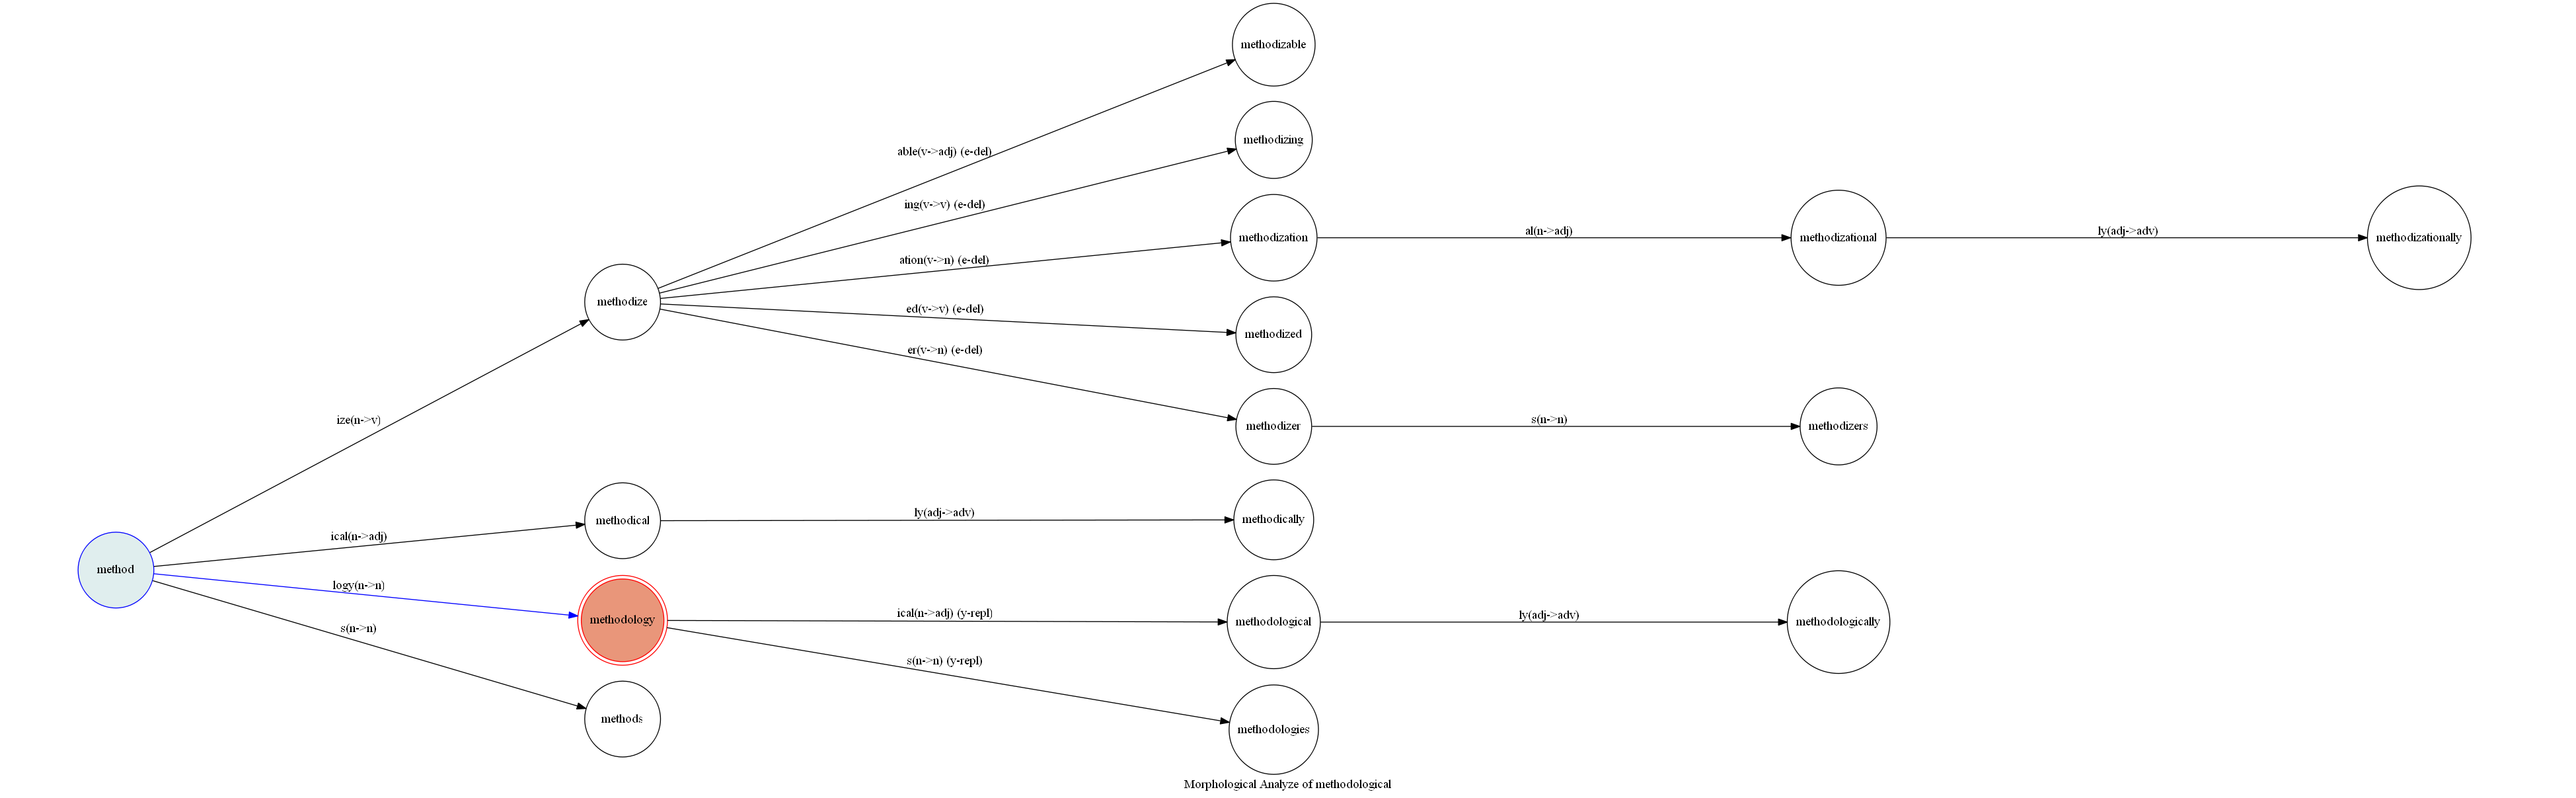

methodology
ical(n->adj) (y-repl)
methodological


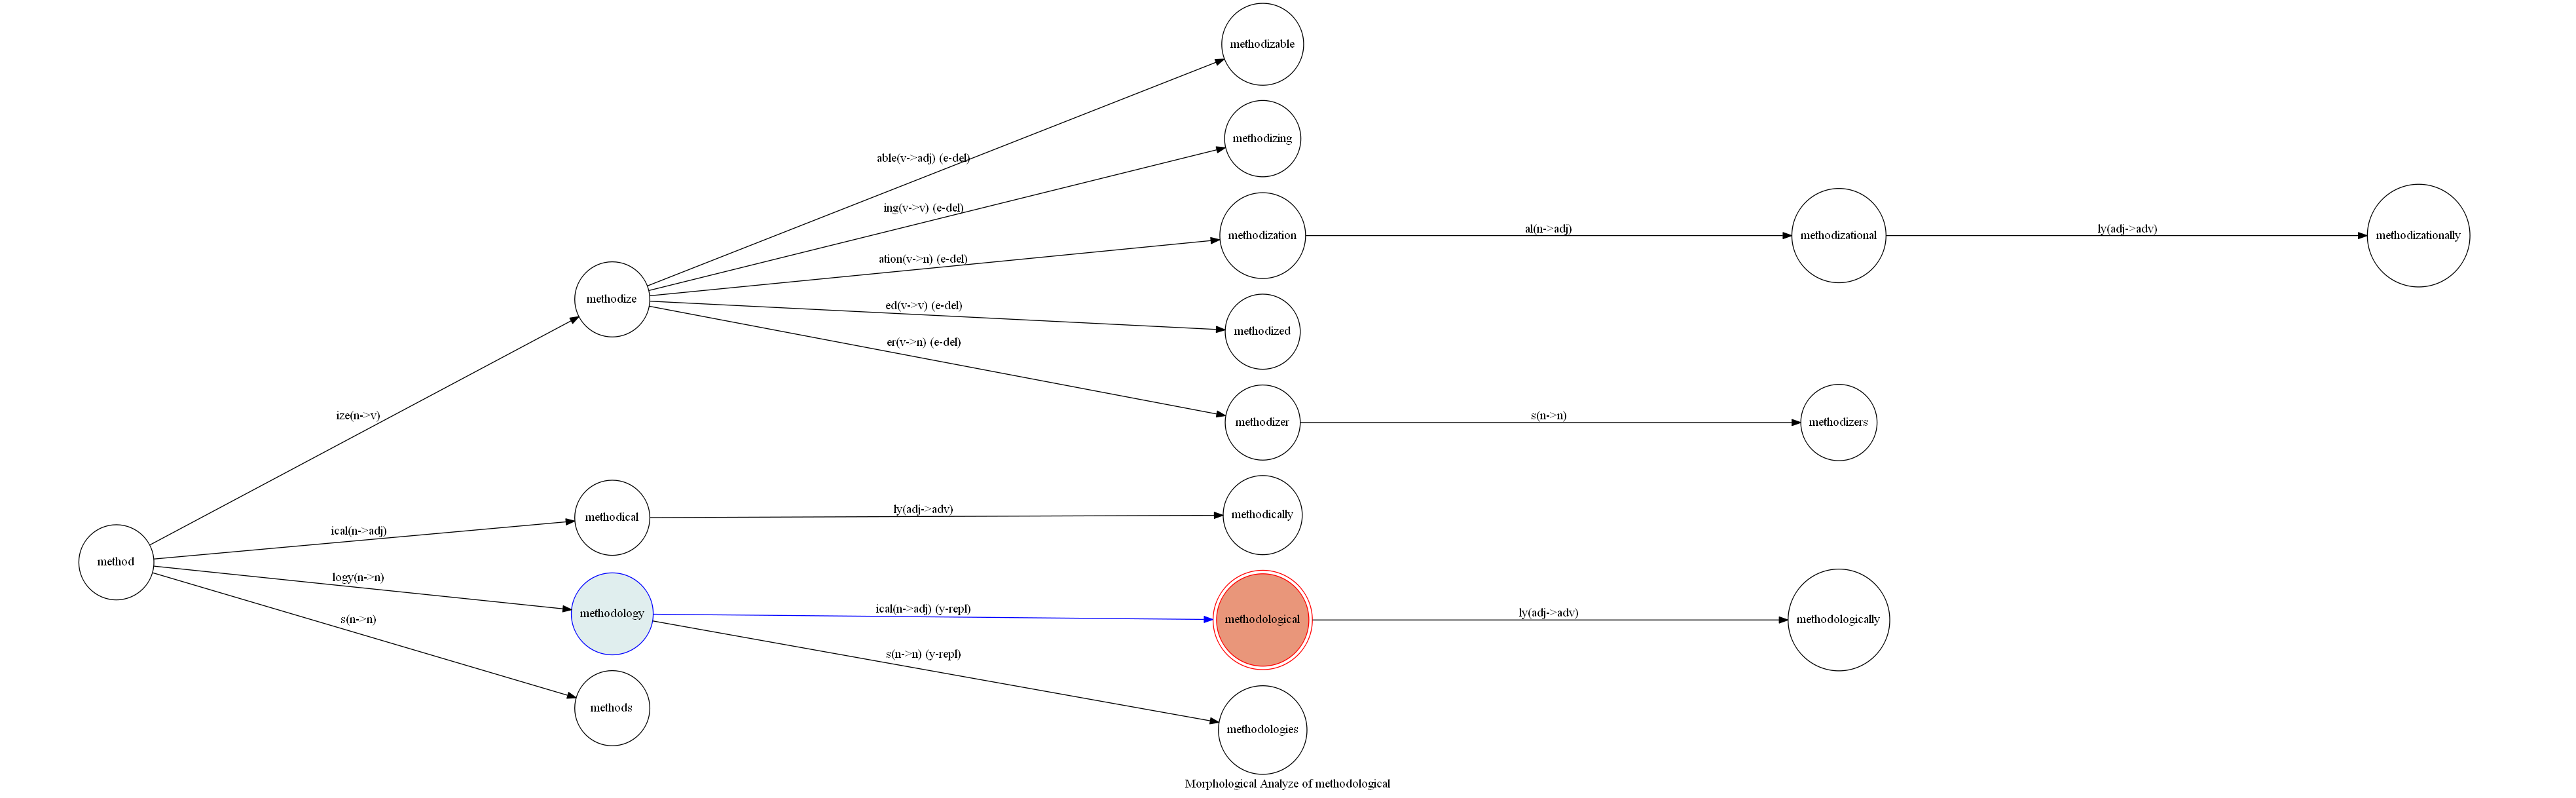

In [338]:
drawFSTs('methodological')

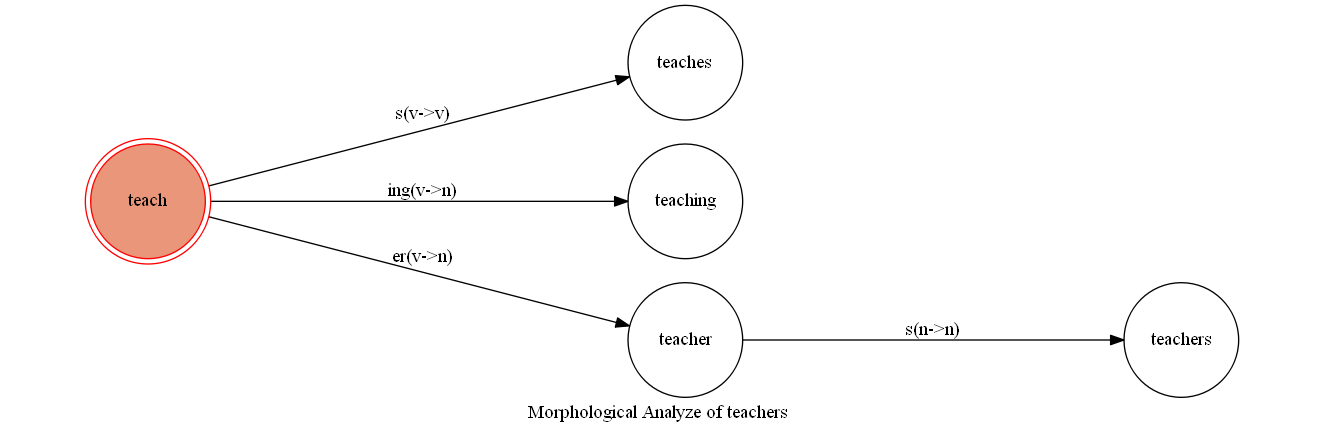

teach
er(v->n)
teacher


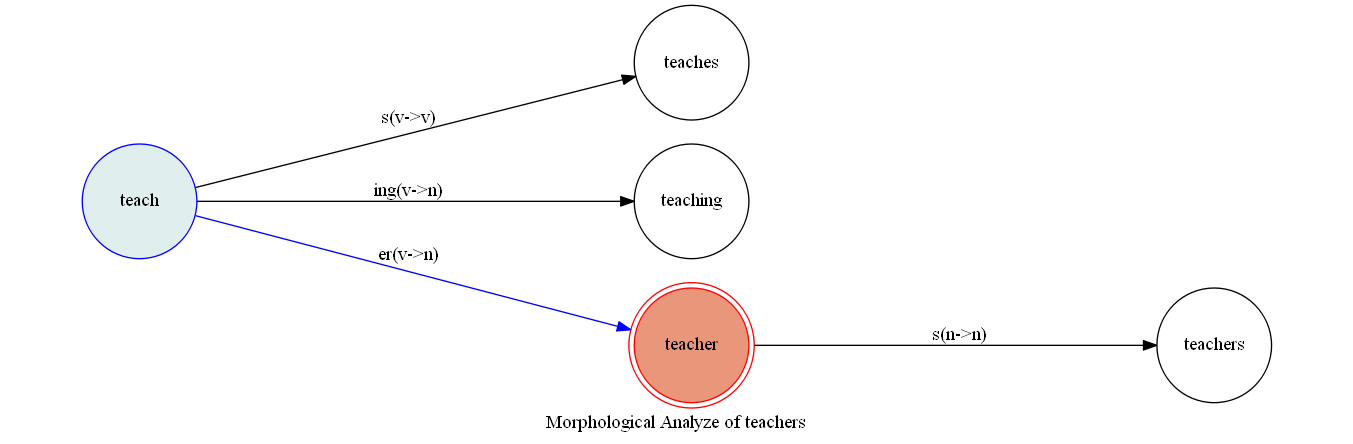

teacher
s(n->n)
teachers


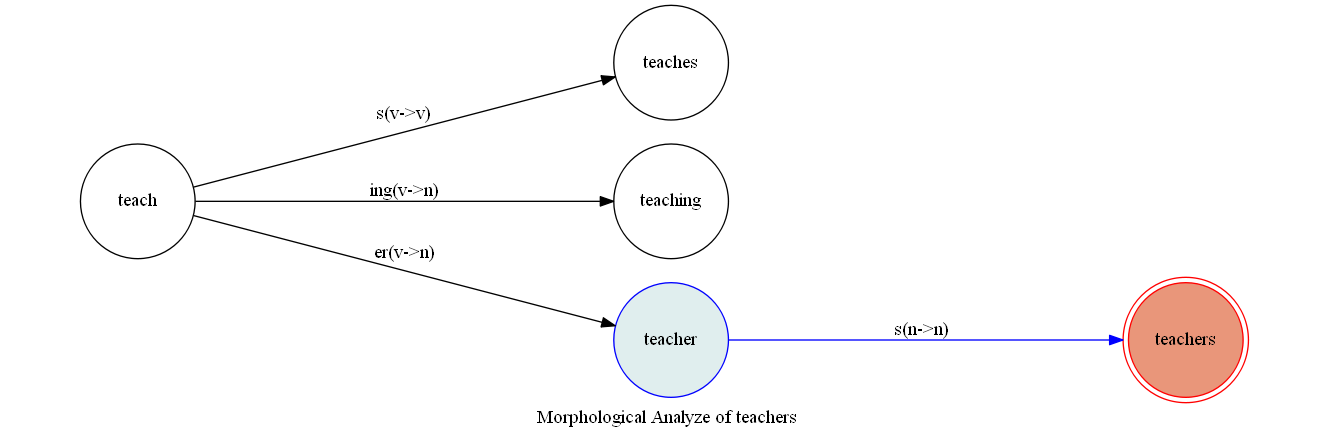

In [343]:
drawFSTs('teachers')